### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [7]:
accepted_percentage = data.query("Y==1").shape[0]/data.shape[0]
print(f"{accepted_percentage*100:.2f} percent people accepted coupans")

56.84 percent people accepted coupans


<Axes: xlabel='passanger', ylabel='count'>

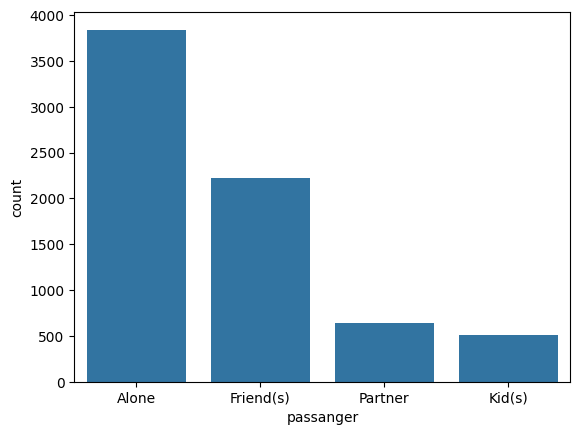

In [8]:
sns.barplot(data.groupby("Y").get_group(1)["passanger"].value_counts())

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'No. of coupons')

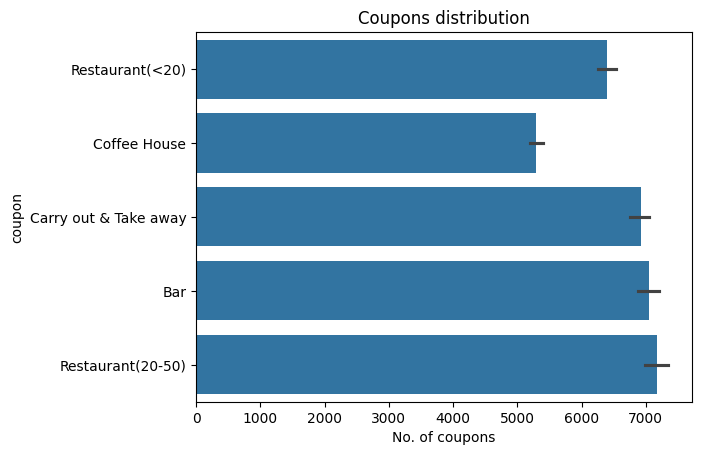

In [9]:
sns.barplot(data["coupon"])
plt.title("Coupons distribution")
plt.xlabel("No. of coupons")

6. Use a histogram to visualize the temperature column.

In [10]:
data.query("Y==1")["temperature"].value_counts()

temperature
80    3919
55    2061
30    1230
Name: count, dtype: int64

Text(0.5, 1.0, 'No. of people visited bar at different temperatures')

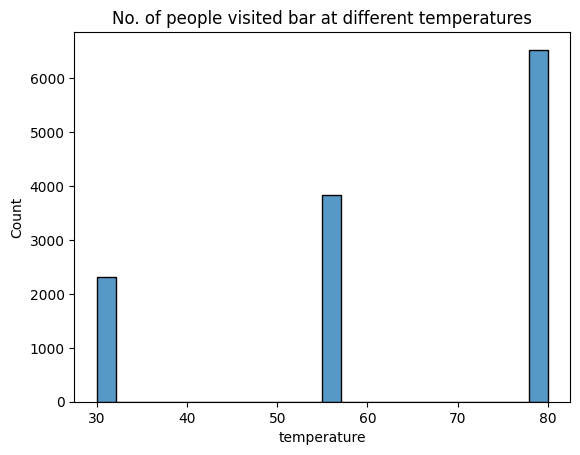

In [11]:
sns.histplot(data["temperature"])
plt.title("No. of people visited bar at different temperatures")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_coupons = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [13]:
coupons_accepted = bar_coupons.query("Y==1").shape[0]/bar_coupons.shape[0]
print(f"{coupons_accepted*100:.2f} percent of bar coupons accepted")

41.00 percent of bar coupons accepted


Text(0, 0.5, 'No. of people')

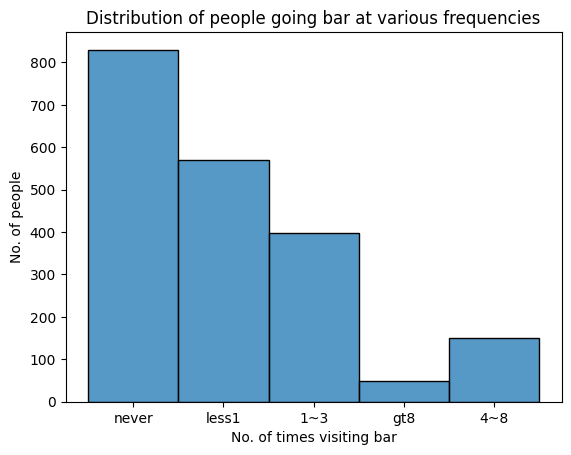

In [14]:
sns.histplot(bar_coupons["Bar"])
plt.title("Distribution of people going bar at various frequencies")
plt.xlabel("No. of times visiting bar")
plt.ylabel("No. of people")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0.5, 0, 'no. of time bar visit in month')

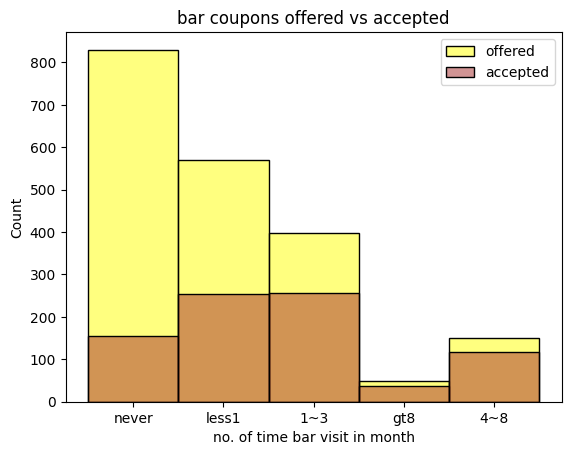

In [15]:
sns.histplot(bar_coupons["Bar"], color="yellow", label="offered", alpha=0.5)
sns.histplot(bar_coupons.query("Y==1")["Bar"], color="brown", label="accepted", alpha=0.5)
plt.legend()
plt.title("bar coupons offered vs accepted")
plt.xlabel("no. of time bar visit in month")

# Analysis to find which bar going customer group has the highest rate of accepting coupons 

In [54]:
fewer_than_3 = bar_coupons.query('Bar in ["nvever", "less1", "1~3"]')

acceptance_3_fewer = fewer_than_3.query("Y==1")
print(f"acceptance rate for people accepted coupon going to bar 3 or fewer times = {(acceptance_3_fewer.shape[0]/fewer_than_3.shape[0])*100:.2f}")

more_than_1 = bar_coupons.query('Bar not in ["never", "less1"]')
acceptance_more_than_1 = more_than_1.query("Y==1")
print(f"acceptance rate for people accepted coupon going to bar more than 1 times = {(acceptance_more_than_1.shape[0]/more_than_1.shape[0])*100:.2f}")

more_than_3 = bar_coupons.query('Bar not in ["never", "less1", "1~3"]')
acceptance_more_than_3 = more_than_3.query("Y==1")
print(f"acceptance rate for people accepted coupon going to bar more than 3 times = {(acceptance_more_than_3.shape[0]/more_than_3.shape[0])*100:.2f}")

more_than_8 = bar_coupons.query('Bar in ["gt8"]')
acceptance_more_than_8 = more_than_8.query("Y==1")
print(f"acceptance rate for people accepted coupon going to bar more than 8 times = {(acceptance_more_than_8.shape[0]/more_than_8.shape[0])*100:.2f}")


acceptance rate for people accepted coupon going to bar 3 or fewer times = 52.74
acceptance rate for people accepted coupon going to bar more than 1 times = 67.75
acceptance rate for people accepted coupon going to bar more than 3 times = 73.18
acceptance rate for people accepted coupon going to bar more than 8 times = 73.47


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
# print(data["age"].unique())

more_than_1_month = bar_coupons.query('Bar not in ["never", "less1"] and age not in ["below21", "21"]')

acceptance_more_than_1_month = more_than_1_month.query("Y==1")
print(f"{(acceptance_more_than_1_month.shape[0]/more_than_1_month.shape[0])*100:.2f}% people accepted coupon going to bar more than once a month and over 25 years of age")

68.18% people accepted coupon going to bar more than once a month and over 25 years of age


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [19]:
# print(bar_coupons["passanger"].unique())
# print(bar_coupons["occupation"].unique())

queried_data = bar_coupons.query('Bar not in ["never", "less1"] and passanger not in ["Kid(s)"] and occupation not in ["Farming Fishing & Forestry"]')
accepted_queried_data = queried_data.query("Y==1")

print(f"acceptace rate of people going to bar more than once, no kids in passanger and doing farming, fishing or forestry = {(accepted_queried_data.shape[0]/queried_data.shape[0])*100:.2f}%")

acceptace rate of people going to bar more than once, no kids in passanger and doing farming, fishing or forestry = 70.30%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [77]:
print(bar_coupons["maritalStatus"].unique())
# print(bar_coupons["RestaurantLessThan20"].unique())
print(bar_coupons["gender"].unique())

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Female' 'Male']


In [21]:
queried_data = bar_coupons.query('Bar not in ["never", "less1"] and passanger not in ["Kid(s)"] and maritalStatus not in ["Widowed"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed = {acceptance_rates_1*100:.2f}%")

queried_data = bar_coupons.query('Bar not in ["never", "less1"] and age in ["21", "26", "below21"]')
acceptance_rates_2 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate go to bars more than once a month and are under the age of 30 = {acceptance_rates_2*100:.2f}%")

queried_data = bar_coupons.query('RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')
acceptance_rates_3 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to cheap restaurants more than 4 times a month and income is less than 50K = {acceptance_rates_3*100:.2f}%")


 acceptance rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed = 70.30%
 acceptance rate go to bars more than once a month and are under the age of 30 = 72.21%
 acceptance rate for go to cheap restaurants more than 4 times a month and income is less than 50K = 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### People who go to the bar more than 8 times a month have highest **(73.47%)** probability of accepting the coupons

# Analysis to find which bar going group has the lowest rate of accepting bar coupons 

In [80]:
queried_data = bar_coupons.query('Bar not in ["never"] and passanger in ["Kid(s)"] and maritalStatus in ["Married partner"] and gender in ["Female"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed = 21.15%


### People who never beeen to bar, and have kids, and married, and female have lowest **(21.15%)** probability of accepting the coupons

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [22]:
coffee_house_coupons = data.query("coupon == 'Coffee House'")

## Data exploration

In [23]:
coffee_house_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [24]:
coffee_house_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3959 non-null   obje

Text(0.5, 0, 'no. of time coffee house visit in month')

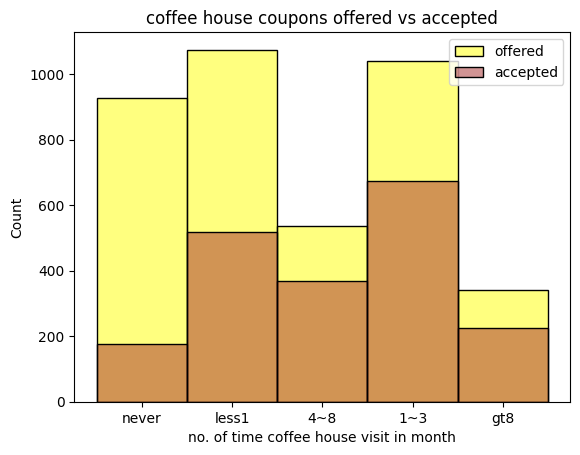

In [87]:
sns.histplot(coffee_house_coupons["CoffeeHouse"], color="yellow", label="offered", alpha=0.5)
sns.histplot(coffee_house_coupons.query("Y==1")["CoffeeHouse"], color="brown", label="accepted", alpha=0.5)
plt.legend()
plt.title("coffee house coupons offered vs accepted")
plt.xlabel("no. of time coffee house visit in month")

Text(0.5, 0, 'no. of time CoffeeHouse visit in month')

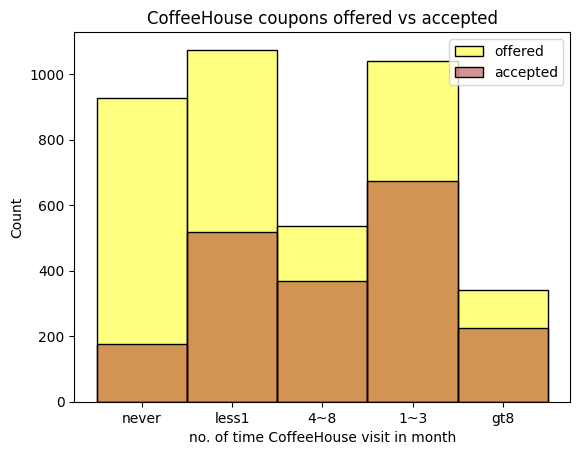

In [108]:
sns.histplot(coffee_house_coupons["CoffeeHouse"], color="yellow", label="offered", alpha=0.5)
sns.histplot(coffee_house_coupons.query("Y==1")["CoffeeHouse"], color="brown", label="accepted", alpha=0.5)
plt.legend()
plt.title("CoffeeHouse coupons offered vs accepted")
plt.xlabel("no. of time CoffeeHouse visit in month")

Text(0.5, 0, 'age')

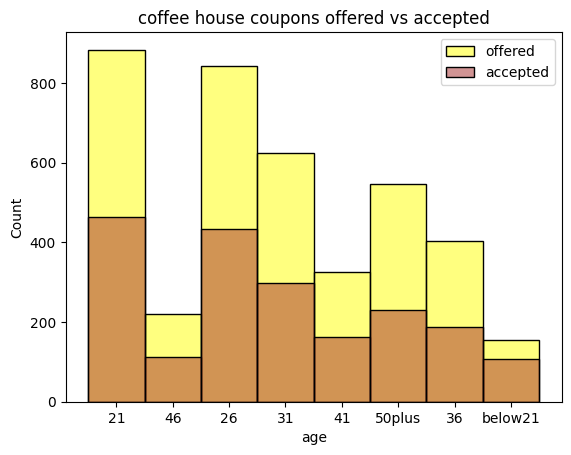

In [91]:
sns.histplot(coffee_house_coupons["age"], color="yellow", label="offered", alpha=0.5)
sns.histplot(coffee_house_coupons.query("Y==1")["age"], color="brown", label="accepted", alpha=0.5)
plt.legend()
plt.title("coffee house coupons offered vs accepted")
plt.xlabel("age")

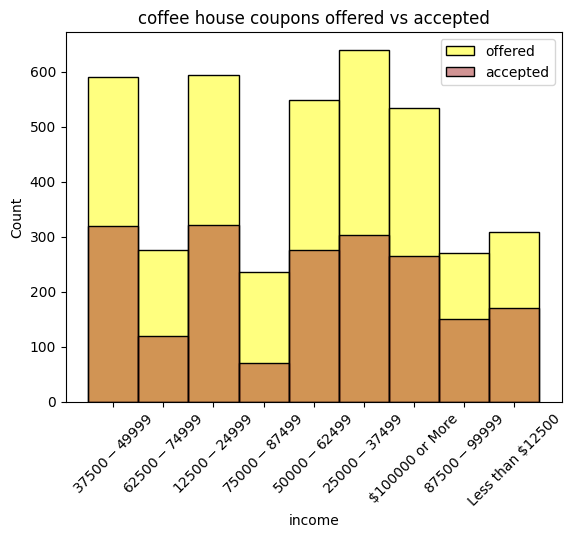

In [97]:
sns.histplot(coffee_house_coupons["income"], color="yellow", label="offered", alpha=0.5)
sns.histplot(coffee_house_coupons.query("Y==1")["income"], color="brown", label="accepted", alpha=0.5)
plt.legend()
plt.title("coffee house coupons offered vs accepted")
plt.xlabel("income")
plt.xticks(rotation=45);

Text(0.5, 0, 'passanger')

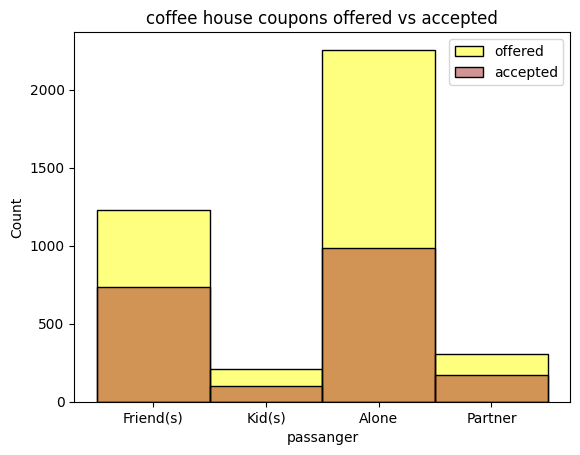

In [93]:
sns.histplot(coffee_house_coupons["passanger"], color="yellow", label="offered", alpha=0.5)
sns.histplot(coffee_house_coupons.query("Y==1")["passanger"], color="brown", label="accepted", alpha=0.5)
plt.legend()
plt.title("coffee house coupons offered vs accepted")
plt.xlabel("passanger")

In [46]:
coffee_house_coupons["CoffeeHouse"].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

# Analysis to find which coffee house group has the highest rate of accepting coffee house coupons 

In [47]:
queried_data = coffee_house_coupons.query('CoffeeHouse not in ["never", "less1"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house more than once a month = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to coffee house more than once a month = 65.30%


In [51]:
queried_data = coffee_house_coupons.query('CoffeeHouse in ["never", "less1"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house lessthan once a month = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to coffee house lessthan once a month = 34.62%


In [49]:
coffee_house_coupons["age"].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [30]:
queried_data = coffee_house_coupons.query('CoffeeHouse not in ["never", "less1"] and age in ["below21", "21"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house more than once a month and age 21 or less = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to coffee house more than once a month and age 21 or less = 71.30%


In [31]:
queried_data = coffee_house_coupons.query('CoffeeHouse not in ["never", "less1"] and age not in ["below21", "21"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house more than once a month and age 21 or more = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to coffee house more than once a month and age 21 or more = 62.90%


In [102]:
queried_data = coffee_house_coupons.query('CoffeeHouse in ["gt8"] and age in ["below21", "21"] and passanger in ["Partner"]')
acceptance_rates = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house more than 8 times once a month = {acceptance_rates*100:.2f}%")

 acceptance rate for go to coffee house more than 8 times once a month = 100.00%


In [32]:
coffee_house_coupons["weather"].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [33]:
queried_data = coffee_house_coupons.query('CoffeeHouse not in ["never", "less1"] and age in ["below21", "21"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house more than once a month and age 21 or less = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to coffee house more than once a month and age 21 or less = 71.30%


In [34]:
coffee_house_coupons["maritalStatus"].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [100]:
queried_data = coffee_house_coupons.query('CoffeeHouse not in ["never", "less1"] and maritalStatus not in ["Single"] and age in ["below21", "21"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house more than once a month and age 21 or less = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to coffee house more than once a month and age 21 or less = 73.01%


### People who go to the coffee house more than 8 times a month and age 21 or lower, and with partner have highest **(100%)** probability of accepting the coffee house coupons¶

# Analysis to find which coffee house group has the lowest rate of accepting coffee house coupons 

In [103]:
queried_data = coffee_house_coupons.query('CoffeeHouse in ["never"] and maritalStatus not in ["Single"] and RestaurantLessThan20 in ["gt8"] and passanger in ["Alone"]')
acceptance_rates_1 = queried_data.query("Y==1").shape[0]/queried_data.shape[0]
print(f" acceptance rate for go to coffee house more than once a month and age 21 or less = {acceptance_rates_1*100:.2f}%")

 acceptance rate for go to coffee house more than once a month and age 21 or less = 0.00%


### People who to to coffee house less than once a month, and single and go to cheap restaurant more that 8 time a month, and no passanger has least **(0%)** probality of accepting the coffee house coupons